In [1]:
# Imports, display options, paths, load CSVs, standardise column names

import sys, os, re
import numpy as np
import pandas as pd

# Display options (so prints are readable)
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 160)

# ---- Set your file paths here ----
PATH_DATASET1 = "dataset1.csv"
PATH_DATASET2 = "dataset2.csv"

def clean_columns(df: pd.DataFrame) -> pd.DataFrame:
    """
    Standardise column names:
    - strip spaces
    - lower case
    - replace spaces/newlines with underscores
    - collapse multiple underscores
    """
    def _clean(c):
        c = str(c).strip().lower()
        c = re.sub(r"[\s\n\r]+", "_", c)
        c = re.sub(r"_+", "_", c)
        return c
    df = df.rename(columns={c: _clean(c) for c in df.columns})
    return df

def try_parse_datetimes(df: pd.DataFrame, candidates):
    """
    Parse listed columns to datetime if they exist; stays as-is if not present.
    Prints which columns were parsed successfully.
    """
    parsed = []
    for col in candidates:
        if col in df.columns:
            before_dtype = df[col].dtype
            df[col] = pd.to_datetime(df[col], errors="coerce", utc=False)
            parsed.append((col, str(before_dtype), str(df[col].dtype)))
    if parsed:
        print("Parsed datetime columns:")
        for col, b4, aft in parsed:
            print(f"  - {col}: {b4} -> {aft}")
    else:
        print("No datetime candidates found in this frame.")
    return df

def try_coerce_numeric(df: pd.DataFrame, candidates):
    """
    Coerce listed columns to numeric if they exist; non-coercible values -> NaN.
    Prints which columns were coerced.
    """
    coerced = []
    for col in candidates:
        if col in df.columns:
            before_dtype = df[col].dtype
            df[col] = pd.to_numeric(df[col], errors="coerce")
            coerced.append((col, str(before_dtype), str(df[col].dtype)))
    if coerced:
        print("Coerced numeric columns:")
        for col, b4, aft in coerced:
            print(f"  - {col}: {b4} -> {aft}")
    else:
        print("No numeric candidates found in this frame.")
    return df

# ---- Load datasets ----
print("Loading datasets...")
df1_raw = pd.read_csv(PATH_DATASET1, low_memory=False)
df2_raw = pd.read_csv(PATH_DATASET2, low_memory=False)

# ---- Standardise column names ----
df1 = clean_columns(df1_raw.copy())
df2 = clean_columns(df2_raw.copy())

print("\nDataset 1 — shape, columns:")
print(df1.shape)
print(list(df1.columns))

print("\nDataset 2 — shape, columns:")
print(df2.shape)
print(list(df2.columns))

# ---- Attempt datetime parsing based on brief ----
df1 = try_parse_datetimes(
    df1,
    candidates=[
        "start_time", "rat_period_start", "rat_period_end", "sunset_time"
    ]
)

df2 = try_parse_datetimes(
    df2,
    candidates=[
        "time"  # 30-min observation start
    ]
)

# ---- Attempt numeric coercion for known quantitative fields ----
df1 = try_coerce_numeric(
    df1,
    candidates=[
        "bat_landing_to_food",
        "seconds_after_rat_arrival",
        "hours_after_sunset",
        "risk", "reward" 
    ]
)

df2 = try_coerce_numeric(
    df2,
    candidates=[
        "hours_after_sunset",
        "bat_landing_number",
        "food_availability",
        "rat_minutes",
        "rat_arrival_number"
    ]
)

# ---- Quick preview ----
print("\nDataset 1 — head():")
display(df1.head(5))

print("\nDataset 1 — dtypes:")
print(df1.dtypes)

print("\nDataset 2 — head():")
display(df2.head(5))

print("\nDataset 2 — dtypes:")
print(df2.dtypes)

df1_orig = df1.copy()
df2_orig = df2.copy()


Loading datasets...

Dataset 1 — shape, columns:
(907, 12)
['start_time', 'bat_landing_to_food', 'habit', 'rat_period_start', 'rat_period_end', 'seconds_after_rat_arrival', 'risk', 'reward', 'month', 'sunset_time', 'hours_after_sunset', 'season']

Dataset 2 — shape, columns:
(2123, 7)
['time', 'month', 'hours_after_sunset', 'bat_landing_number', 'food_availability', 'rat_minutes', 'rat_arrival_number']
Parsed datetime columns:
  - start_time: object -> datetime64[ns]
  - rat_period_start: object -> datetime64[ns]
  - rat_period_end: object -> datetime64[ns]
  - sunset_time: object -> datetime64[ns]
Parsed datetime columns:
  - time: object -> datetime64[ns]
Coerced numeric columns:
  - bat_landing_to_food: float64 -> float64
  - seconds_after_rat_arrival: int64 -> int64
  - hours_after_sunset: float64 -> float64
  - risk: int64 -> int64
  - reward: int64 -> int64
Coerced numeric columns:
  - hours_after_sunset: float64 -> float64
  - bat_landing_number: int64 -> int64
  - food_availabi

/var/folders/1w/8b8h2jvn4pgfhr2ptd4rjg0w0000gn/T/ipykernel_96253/2198897396.py:40: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors="coerce", utc=False)
/var/folders/1w/8b8h2jvn4pgfhr2ptd4rjg0w0000gn/T/ipykernel_96253/2198897396.py:40: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors="coerce", utc=False)
/var/folders/1w/8b8h2jvn4pgfhr2ptd4rjg0w0000gn/T/ipykernel_96253/2198897396.py:40: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors="coerce", utc=False)
/var/folders/1w/8b8h2jvn4pgfhr2ptd4rjg0w0000gn/T/ipykernel

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season
0,2017-12-30 18:37:00,16.000000,rat,2017-12-30 18:35:00,2017-12-30 18:38:00,108,1,0,0,2017-12-30 16:45:00,1.870833,0
1,2017-12-30 19:51:00,0.074016,fast,2017-12-30 19:50:00,2017-12-30 19:55:00,17,0,1,0,2017-12-30 16:45:00,3.100833,0
2,2017-12-30 19:51:00,4.000000,fast,2017-12-30 19:50:00,2017-12-30 19:55:00,41,0,1,0,2017-12-30 16:45:00,3.107500,0
3,2017-12-30 19:52:00,10.000000,rat,2017-12-30 19:50:00,2017-12-30 19:55:00,111,1,0,0,2017-12-30 16:45:00,3.126944,0
4,2017-12-30 19:54:00,15.000000,rat,2017-12-30 19:50:00,2017-12-30 19:55:00,194,1,0,0,2017-12-30 16:45:00,3.150000,0



Dataset 1 — dtypes:
start_time                   datetime64[ns]
bat_landing_to_food                 float64
habit                                object
rat_period_start             datetime64[ns]
rat_period_end               datetime64[ns]
seconds_after_rat_arrival             int64
risk                                  int64
reward                                int64
month                                 int64
sunset_time                  datetime64[ns]
hours_after_sunset                  float64
season                                int64
dtype: object

Dataset 2 — head():


,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,2017-12-26 16:13:00,0,-0.5,20,4.000000,0.0,0
1,2017-12-26 16:43:00,0,0.0,28,4.000000,0.0,0
2,2017-12-26 17:13:00,0,0.5,25,4.000000,0.0,0
3,2017-12-26 17:43:00,0,1.0,71,4.000000,0.0,0
4,2017-12-26 18:13:00,0,1.5,44,3.753857,0.0,0



Dataset 2 — dtypes:
time                  datetime64[ns]
month                          int64
hours_after_sunset           float64
bat_landing_number             int64
food_availability            float64
rat_minutes                  float64
rat_arrival_number             int64
dtype: object


In [2]:
#  Missingness scan, duplicates, and basic integrity checks

def null_report(df: pd.DataFrame, name: str):
    rep = pd.DataFrame({
        "non_null": df.notna().sum(),
        "nulls": df.isna().sum(),
    })
    rep["pct_null"] = (rep["nulls"] / len(df) * 100).round(2)
    print(f"\n=== Null Report: {name} (n={len(df)}) ===")
    display(rep.sort_values("pct_null", ascending=False))

print("=== DUPLICATES ===")
dup1 = df1.duplicated().sum()
dup2 = df2.duplicated().sum()
print(f"Dataset1 duplicates: {dup1}")
print(f"Dataset2 duplicates: {dup2}")

# ---- Missingness ----
null_report(df1, "dataset1")
null_report(df2, "dataset2")

# ---- Basic integrity checks: dataset1 ----
print("\n=== Basic Integrity: dataset1 ===")

# Time order: rat_period_start <= rat_period_end
mask_time_order_bad = (df1["rat_period_start"] > df1["rat_period_end"])
print(f"Rows with rat_period_start > rat_period_end: {mask_time_order_bad.sum()}")
if mask_time_order_bad.any():
    display(df1.loc[mask_time_order_bad, ["start_time","rat_period_start","rat_period_end"]].head(10))

#  Non-negative checks
mask_neg_bltf = df1["bat_landing_to_food"] < 0
mask_neg_sec_after = df1["seconds_after_rat_arrival"] < 0
print(f"Negative bat_landing_to_food: {mask_neg_bltf.sum()}")
print(f"Negative seconds_after_rat_arrival: {mask_neg_sec_after.sum()}")

#Categorical sanity checks
print("\nUnique 'habit' values (top 10 by frequency):")
display(df1["habit"].value_counts().head(10))

print("Unique 'month' values:", sorted(df1["month"].dropna().unique().tolist()))
print("Unique 'season' values:", sorted(df1["season"].dropna().unique().tolist()))
print("Unique 'risk' values:", sorted(df1["risk"].dropna().unique().tolist()))
print("Unique 'reward' values:", sorted(df1["reward"].dropna().unique().tolist()))

# Consistency: seconds_after_rat_arrival ≈ (start_time - rat_period_start).seconds
sec_after_calc = (df1["start_time"] - df1["rat_period_start"]).dt.total_seconds()
diff_sec_after = sec_after_calc - df1["seconds_after_rat_arrival"]
abs_diff_sec = diff_sec_after.abs()

print("\nseconds_after_rat_arrival consistency check:")
print("  mean abs diff (s):", round(abs_diff_sec.mean(), 3))
print("  median abs diff (s):", round(abs_diff_sec.median(), 3))
print("  95th pct abs diff (s):", round(abs_diff_sec.quantile(0.95), 3))
print("  max abs diff (s):", round(abs_diff_sec.max(), 3))

# show a few largest discrepancies
idx_top = abs_diff_sec.nlargest(5).index
display(df1.loc[idx_top, ["start_time","rat_period_start","seconds_after_rat_arrival"]].assign(
    calculated_seconds=sec_after_calc.loc[idx_top],
    abs_diff=abs_diff_sec.loc[idx_top]
))

# Consistency: hours_after_sunset ≈ (start_time - sunset_time)/3600
hrs_after_calc = (df1["start_time"] - df1["sunset_time"]).dt.total_seconds() / 3600.0
diff_hrs_after = hrs_after_calc - df1["hours_after_sunset"]
abs_diff_hrs = diff_hrs_after.abs()

print("\nhours_after_sunset consistency check:")
print("  mean abs diff (h):", round(abs_diff_hrs.mean(), 5))
print("  median abs diff (h):", round(abs_diff_hrs.median(), 5))
print("  95th pct abs diff (h):", round(abs_diff_hrs.quantile(0.95), 5))
print("  max abs diff (h):", round(abs_diff_hrs.max(), 5))

# show a few largest discrepancies
idx_top2 = abs_diff_hrs.nlargest(5).index
display(df1.loc[idx_top2, ["start_time","sunset_time","hours_after_sunset"]].assign(
    calculated_hours=hrs_after_calc.loc[idx_top2],
    abs_diff=abs_diff_hrs.loc[idx_top2]
))


=== DUPLICATES ===
Dataset1 duplicates: 1
Dataset2 duplicates: 0

=== Null Report: dataset1 (n=907) ===


,non_null,nulls,pct_null
habit,866,41,4.52
start_time,907,0,0.00
bat_landing_to_food,907,0,0.00
rat_period_start,907,0,0.00
rat_period_end,907,0,0.00
seconds_after_rat_arrival,907,0,0.00
risk,907,0,0.00
reward,907,0,0.00
month,907,0,0.00
sunset_time,907,0,0.00



=== Null Report: dataset2 (n=2123) ===


,non_null,nulls,pct_null
time,2123,0,0.0
month,2123,0,0.0
hours_after_sunset,2123,0,0.0
bat_landing_number,2123,0,0.0
food_availability,2123,0,0.0
rat_minutes,2123,0,0.0
rat_arrival_number,2123,0,0.0



=== Basic Integrity: dataset1 ===
Rows with rat_period_start > rat_period_end: 0
Negative bat_landing_to_food: 0
Negative seconds_after_rat_arrival: 0

Unique 'habit' values (top 10 by frequency):


habit
fast            245
rat             221
pick            139
bat              30
bat_fight        26
bat_and_pick     20
bat_and_rat      19
rat_and_bat      14
rat_pick         14
rat_and_pick      8
Name: count, dtype: int64

Unique 'month' values: [0, 1, 2, 3, 4, 5]
Unique 'season' values: [0, 1]
Unique 'risk' values: [0, 1]
Unique 'reward' values: [0, 1]

seconds_after_rat_arrival consistency check:
  mean abs diff (s): 20.335
  median abs diff (s): 18.0
  95th pct abs diff (s): 47.0
  max abs diff (s): 58.0


,start_time,rat_period_start,seconds_after_rat_arrival,calculated_seconds,abs_diff
662,2018-04-21 02:15:00,2018-04-21 02:06:00,482,540.0,58.0
651,2018-04-20 21:27:00,2018-04-20 21:20:00,477,420.0,57.0
665,2018-04-21 02:17:00,2018-04-21 02:06:00,603,660.0,57.0
65,2018-02-10 00:49:00,2018-02-10 00:49:00,56,0.0,56.0
594,2018-04-28 05:55:00,2018-04-28 05:55:00,56,0.0,56.0



hours_after_sunset consistency check:
  mean abs diff (h): 0.00825
  median abs diff (h): 0.00833
  95th pct abs diff (h): 0.01583
  max abs diff (h): 0.01639


,start_time,sunset_time,hours_after_sunset,calculated_hours,abs_diff
431,2018-04-22 05:27:00,2018-04-21 19:14:00,10.233056,10.216667,0.016389
156,2018-03-29 00:49:00,2018-03-28 18:57:00,5.883056,5.866667,0.016389
59,2018-02-20 01:49:00,2018-02-19 17:30:00,8.333056,8.316667,0.016389
266,2018-04-26 22:30:00,2018-04-26 19:17:00,3.233056,3.216667,0.016389
305,2018-04-27 01:21:00,2018-04-26 19:17:00,6.083056,6.066667,0.016389


In [3]:
# Basic cleaning (drop duplicate, handle missing habit, tidy categories)

#  Drop the exact duplicate row from dataset1
df1 = df1.drop_duplicates()

#  Check again for duplicates after dropping
print("Duplicates remaining in dataset1:", df1.duplicated().sum())

#  Handle missing 'habit' (41 nulls)
print("Missing 'habit' rows before:", df1["habit"].isna().sum())

df1["habit"] = df1["habit"].fillna("unknown")

print("Missing 'habit' rows after fill:", df1["habit"].isna().sum())

# Cast risk/reward/season to category for easier interpretation
for col in ["risk", "reward", "season"]:
    df1[col] = df1[col].astype("category")

#  Preview cleaned dataset1
print("\nDataset1 after cleaning:")
print(df1.info())
display(df1.head(3))

print("\nDataset2 basic checks:")
print("Negative food_availability:", (df2["food_availability"] < 0).sum())
print("Negative rat_minutes:", (df2["rat_minutes"] < 0).sum())


Duplicates remaining in dataset1: 0
Missing 'habit' rows before: 41
Missing 'habit' rows after fill: 0

Dataset1 after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 906 entries, 0 to 906
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   start_time                 906 non-null    datetime64[ns]
 1   bat_landing_to_food        906 non-null    float64       
 2   habit                      906 non-null    object        
 3   rat_period_start           906 non-null    datetime64[ns]
 4   rat_period_end             906 non-null    datetime64[ns]
 5   seconds_after_rat_arrival  906 non-null    int64         
 6   risk                       906 non-null    category      
 7   reward                     906 non-null    category      
 8   month                      906 non-null    int64         
 9   sunset_time                906 non-null    datetime64[ns]
 10  hours_afte

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season
0,2017-12-30 18:37:00,16.000000,rat,2017-12-30 18:35:00,2017-12-30 18:38:00,108,1,0,0,2017-12-30 16:45:00,1.870833,0
1,2017-12-30 19:51:00,0.074016,fast,2017-12-30 19:50:00,2017-12-30 19:55:00,17,0,1,0,2017-12-30 16:45:00,3.100833,0
2,2017-12-30 19:51:00,4.000000,fast,2017-12-30 19:50:00,2017-12-30 19:55:00,41,0,1,0,2017-12-30 16:45:00,3.107500,0



Dataset2 basic checks:
Negative food_availability: 0
Negative rat_minutes: 0


In [4]:
# Feature engineering

# --- Dataset1 Features ---
df1_fe = df1.copy()

# Binary: was rat present at bat landing?
df1_fe["rat_present"] = ((df1_fe["start_time"] >= df1_fe["rat_period_start"]) & 
                         (df1_fe["start_time"] <= df1_fe["rat_period_end"])).astype(int)

# Vigilance proxy: long bat_landing_to_food means more cautious (flag if > median)
median_bltf = df1_fe["bat_landing_to_food"].median()
df1_fe["vigilance_high"] = (df1_fe["bat_landing_to_food"] > median_bltf).astype(int)

# Map season codes to labels (if known: 0=winter, 1=spring — adjust if needed)
season_map = {0: "winter", 1: "spring"}
df1_fe["season_label"] = df1_fe["season"].map(season_map)

print("\nDataset1 engineered features preview:")
display(df1_fe[["start_time","rat_present","bat_landing_to_food","vigilance_high","risk","reward","season_label"]].head(10))


# --- Dataset2 Features ---
df2_fe = df2.copy()

# Binary: any rats arrived in that 30min window?
df2_fe["rat_any"] = (df2_fe["rat_arrival_number"] > 0).astype(int)

# Rat pressure intensity: rat_minutes / 30
df2_fe["rat_intensity"] = df2_fe["rat_minutes"] / 30.0

# Normalised bat landings: bat_landing_number scaled by food availability
# (avoid division by zero)
df2_fe["bat_per_food"] = df2_fe["bat_landing_number"] / df2_fe["food_availability"].replace(0, np.nan)

print("\nDataset2 engineered features preview:")
display(df2_fe[["time","rat_arrival_number","rat_any","rat_intensity","bat_landing_number","bat_per_food"]].head(10))



Dataset1 engineered features preview:


,start_time,rat_present,bat_landing_to_food,vigilance_high,risk,reward,season_label
0,2017-12-30 18:37:00,1,16.000000,1,1,0,winter
1,2017-12-30 19:51:00,1,0.074016,0,0,1,winter
2,2017-12-30 19:51:00,1,4.000000,0,0,1,winter
3,2017-12-30 19:52:00,1,10.000000,1,1,0,winter
4,2017-12-30 19:54:00,1,15.000000,1,1,0,winter
5,2017-12-30 19:54:00,1,24.000000,1,1,0,winter
6,2017-12-30 19:54:00,1,13.000000,1,1,0,winter
7,2017-12-26 21:24:00,1,15.000000,1,1,0,winter
8,2017-12-26 21:24:00,1,6.000000,1,0,1,winter
9,2017-12-26 21:24:00,1,3.000000,0,0,1,winter



Dataset2 engineered features preview:


,time,rat_arrival_number,rat_any,rat_intensity,bat_landing_number,bat_per_food
0,2017-12-26 16:13:00,0,0,0.000000,20,5.000000
1,2017-12-26 16:43:00,0,0,0.000000,28,7.000000
2,2017-12-26 17:13:00,0,0,0.000000,25,6.250000
3,2017-12-26 17:43:00,0,0,0.000000,71,17.750000
4,2017-12-26 18:13:00,0,0,0.000000,44,11.721278
5,2017-12-26 18:43:00,0,0,0.000000,44,13.980392
6,2017-12-26 19:13:00,0,0,0.000000,41,13.666667
7,2017-12-26 19:43:00,0,0,0.000000,54,18.000000
8,2017-12-26 20:13:00,0,0,0.000000,32,10.666667
9,2017-12-26 20:43:00,2,1,0.042778,51,17.178231


In [7]:
# Descriptive stats for Investigation A

desc_A = df1_fe.groupby("rat_present").agg(
    n_obs=("rat_present", "size"),
    risk_mean=("risk", lambda x: pd.to_numeric(x).mean()),
    reward_mean=("reward", lambda x: pd.to_numeric(x).mean()),
    vigilance_high_mean=("vigilance_high", "mean"),
    bltf_median=("bat_landing_to_food", "median"),
    bltf_mean=("bat_landing_to_food", "mean")
).reset_index()

print("\n=== Descriptive Statistics: Investigation A (by rat presence) ===")
display(desc_A)



=== Descriptive Statistics: Investigation A (by rat presence) ===


,rat_present,n_obs,risk_mean,reward_mean,vigilance_high_mean,bltf_median,bltf_mean
0,1,906,0.494481,0.534216,0.45585,4.0,11.720544


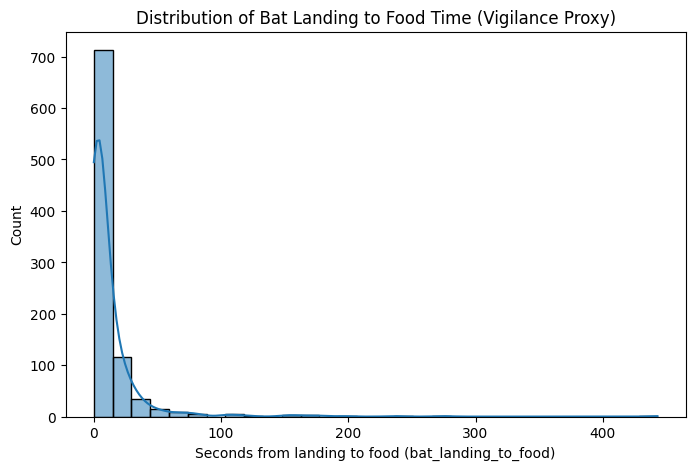

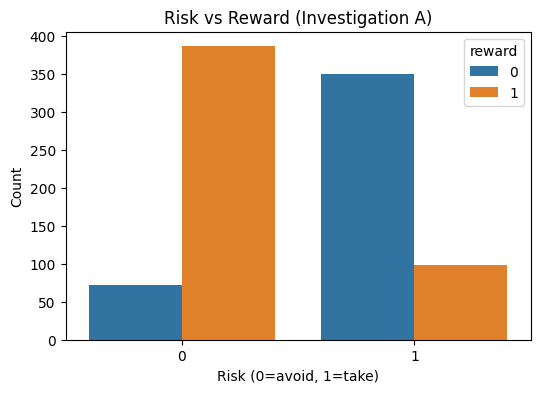

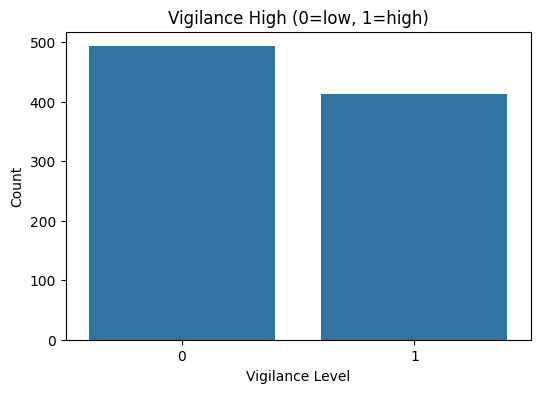

In [8]:
# Visualisations for Investigation A

import matplotlib.pyplot as plt
import seaborn as sns

# --- Distribution of bat_landing_to_food (vigilance proxy) ---
plt.figure(figsize=(8,5))
sns.histplot(df1_fe["bat_landing_to_food"], bins=30, kde=True)
plt.xlabel("Seconds from landing to food (bat_landing_to_food)")
plt.ylabel("Count")
plt.title("Distribution of Bat Landing to Food Time (Vigilance Proxy)")
plt.show()

# --- Risk vs Reward counts ---
plt.figure(figsize=(6,4))
sns.countplot(data=df1_fe, x="risk", hue="reward")
plt.title("Risk vs Reward (Investigation A)")
plt.xlabel("Risk (0=avoid, 1=take)")
plt.ylabel("Count")
plt.show()

# --- Vigilance (binary) distribution ---
plt.figure(figsize=(6,4))
sns.countplot(data=df1_fe, x="vigilance_high")
plt.title("Vigilance High (0=low, 1=high)")
plt.xlabel("Vigilance Level")
plt.ylabel("Count")
plt.show()


In [9]:
#Inferential test for Investigation A (Vigilance vs Rat presence)

import scipy.stats as stats

# Compare vigilance_high between rat presence states
contingency = pd.crosstab(df1_fe["rat_present"], df1_fe["vigilance_high"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)

print("=== Chi-Square Test: Vigilance vs Rat Presence ===")
print("Chi2 statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("\nContingency Table:")
print(contingency)


=== Chi-Square Test: Vigilance vs Rat Presence ===
Chi2 statistic: 0.0
p-value: 1.0
Degrees of freedom: 0

Contingency Table:
vigilance_high    0    1
rat_present             
1               493  413
